In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("dog_rates_tweets.csv")
data.dtypes

id             int64
created_at    object
text          object
dtype: object

In [3]:
# read csv file containing tweets 
# parse datetime_values druing reading file 
data = pd.read_csv("dog_rates_tweets.csv", parse_dates=['created_at'])
data.dtypes

id                     int64
created_at    datetime64[ns]
text                  object
dtype: object

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# acquiring rating using pandas lib 
# filter rows that does not contain ratings
filtered_data = data[data['text'].str.contains(r'(\d+(\.\d+)?)/10')]      # uses re.search()
# extract rating as float & and add to df as col
filtered_data['rating'] = filtered_data['text'].str.extract(r'(\d+(\.\d+)?)/10')[0].astype(float)       # uses re.match()
# filter rows that contain invalid rating such as greater than 25/10
filtered_data = filtered_data[filtered_data['rating'] <= 25]
filtered_data.head()

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0


In [6]:
import matplotlib.pyplot as plt

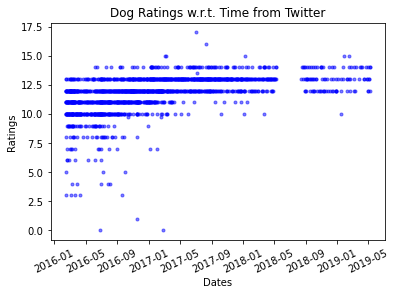

In [7]:
# plot ratings vs. dates 
plt.plot(filtered_data['created_at'], filtered_data['rating'], 'b.', alpha=0.5)
# add title and label the axes
plt.title("Dog Ratings w.r.t. Time from Twitter")
plt.xlabel("Dates")
plt.ylabel("Ratings")
plt.xticks(rotation=25)
plt.show()

In [8]:
# alternative: templete following provided hints*
import numpy as np 
import re

def search_text(s):
    return (re.search(r'(\d+(\.\d+)?)/10', s))
sea_text = np.vectorize(search_text)
sea_text(data['text'])      # incomplete...

array([None, None, <re.Match object; span=(78, 83), match='14/10'>, ...,
       None, None, None], dtype=object)

In [9]:
# create function to generate timestamp from series 
def to_timestamp(t):
    return t.timestamp()

# make a copy of data 
data2 = filtered_data
# add timestamp col to new df
data2['timestamp'] = data2['created_at'].apply(to_timestamp)
data2.head()

,id,created_at,text,rating,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09


In [10]:
from scipy import stats

In [11]:
# compute linear regression of x=timestamp and y=rating
result = stats.linregress(data2['timestamp'], data2['rating'])
?result

In [12]:
# make prediction using LR model and add col to df
data2['prediction'] = result.slope*data2['timestamp'] + result.intercept
data2

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [13]:
# display model's fit and intercept 
result.slope, result.intercept

(3.515929974847724e-08, -40.4641548089892)

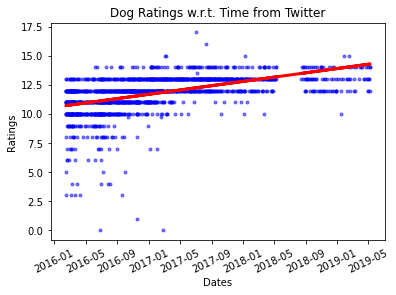

In [14]:
# plot ratings (original value) vs. dates
plt.plot(filtered_data['created_at'], filtered_data['rating'], 'b.', alpha=0.5)
# plot best fit line using model's prediction
plt.plot(data2['created_at'], data2['prediction'], 'r-', linewidth=3)
# add title and label the axes
plt.title("Dog Ratings w.r.t. Time from Twitter")
plt.xlabel("Dates")
plt.ylabel("Ratings")
plt.xticks(rotation=25)
plt.show()